In [484]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
import json
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam # - Works


turning an image into array

In [485]:
temp_img = load_img('./cropped/0.jpg', color_mode='grayscale')

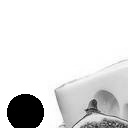

In [486]:
temp_img

In [487]:
temp_img_array = img_to_array(temp_img)

In [488]:
temp_img_array.shape

(128, 128, 1)

In [546]:
def generate_dataset():
    X = []
    Y = []
    
    # X
    files = glob.glob('./cropped/*.jpg')
    for f in files:
        temp_img = load_img(f, color_mode='grayscale')
        arr      = img_to_array(temp_img)
        X.append(arr)
    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0
    
    # Y
    with open('labels.json') as f:
        data = json.load(f)
    for d in data:
        y = [(d['center'][0]-64), (d['center'][1]-64)]
        Y.append(y)
    Y = np.asarray(Y)
    Y = Y.astype('float32')
    return X, Y

In [547]:
X, Y = generate_dataset() # this takes a while, idk why.

In [548]:
X.shape, Y.shape

((10220, 128, 128, 1), (10220, 2))

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)


In [550]:
# CNNを構築
model = Sequential()

model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(2))
# コンパイル
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])



In [551]:
# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=16, epochs=100,
                   validation_data = (X_test, y_test))


Epoch 1/100
428/428 [==============================] - 7s 15ms/step - loss: 136.8680 - mean_squared_error: 136.8680 - val_loss: 671.2038 - val_mean_squared_error: 671.2038
Epoch 2/100
428/428 [==============================] - 6s 14ms/step - loss: 57.6494 - mean_squared_error: 57.6494 - val_loss: 46.9906 - val_mean_squared_error: 46.9906
Epoch 3/100
428/428 [==============================] - 6s 14ms/step - loss: 39.3867 - mean_squared_error: 39.3867 - val_loss: 44.2977 - val_mean_squared_error: 44.2977
Epoch 4/100
428/428 [==============================] - 6s 15ms/step - loss: 33.3891 - mean_squared_error: 33.3891 - val_loss: 22.2204 - val_mean_squared_error: 22.2204
Epoch 5/100
428/428 [==============================] - 6s 14ms/step - loss: 28.6820 - mean_squared_error: 28.6820 - val_loss: 36.7263 - val_mean_squared_error: 36.7263
Epoch 6/100
428/428 [==============================] - 7s 16ms/step - loss: 30.0681 - mean_squared_error: 30.0681 - val_loss: 51.7771 - val_mean_squared_err

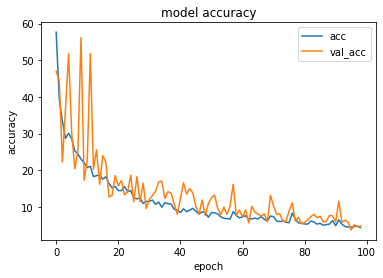

In [552]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='upper right')
plt.show()

In [553]:
y_train[0]

array([ 37., -25.], dtype=float32)

In [554]:
model.predict(X_test)[:10]

array([[ 12.34896  ,  37.328274 ],
       [ 11.181453 ,  43.016487 ],
       [ 47.53056  , -40.504528 ],
       [ -0.9806482,  46.15239  ],
       [-30.838171 , -14.300249 ],
       [-31.12638  , -21.614088 ],
       [ 21.667192 ,   9.929015 ],
       [ 33.08677  , -10.459121 ],
       [-46.495625 , -15.43841  ],
       [-47.66569  ,  -1.8897467]], dtype=float32)

In [555]:
y_test[:10]

array([[ 13.,  36.],
       [ 12.,  42.],
       [ 49., -42.],
       [ -4.,  47.],
       [-32., -15.],
       [-32., -22.],
       [ 21.,  10.],
       [ 32., -10.],
       [-48., -16.],
       [-49.,  -2.]], dtype=float32)

https://jp.mathworks.com/help/deeplearning/ug/train-a-convolutional-neural-network-for-regression.html

In [556]:
# TODO: Normalization?
# integer output made everthing pretty nice.
model.save('20210818-00')

INFO:tensorflow:Assets written to: 20210818-00\assets


INFO:tensorflow:Assets written to: 20210818-00\assets
